<a href="https://colab.research.google.com/github/andrewpersaud1/Climate-change-vs-human-health/blob/main/474_Scatterplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import altair as alt

In [ ]:
cols = ['Entity','Code','Year','Number of disasters (EMDAT (2020))']

churn = pd.read_csv("https://raw.githubusercontent.com/andrewpersaud1/Climate-change-vs-human-health/main/datasets/natural-disasters-by-type.csv", usecols=cols)\
.sample(n=50)


churn.head()




,Entity,Code,Year,Number of disasters (EMDAT (2020))
729,Volcanic activity,NaN,1973,1
69,All natural disasters,NaN,1969,62
625,Landslide,NaN,1983,15
794,Wildfire,NaN,1976,1
345,Extreme temperature,NaN,1997,13


In [ ]:
cols1 = ['Year','Crude summer death rate per million, general population','Crude summer death rate per million, age 65+ population','Crude summer death rate per million, non-white population', 'Crude summer death rate per million, non-Hispanic black population']

df3 = pd.read_csv("https://raw.githubusercontent.com/Vizulization-Final-Project/Climate-change-vs-human-health/main/datasets/heat-deaths_fig-2_1.csv?token=GHSAT0AAAAAABUEBFH4BZ3S6347EFBKNJ4KYUEPE2A",usecols=cols1)\
.sample(n=10)


df3.head()


,Year,"Crude summer death rate per million, general population","Crude summer death rate per million, age 65+ population","Crude summer death rate per million, non-white population","Crude summer death rate per million, non-Hispanic black population"
5,2004,0.078550,0.276218,0.053442,0.027138
4,2003,0.224055,1.059572,0.272812,0.384381
11,2010,0.514987,2.384028,0.852782,1.369268
17,2016,0.495161,2.030696,0.454386,0.735614
9,2008,0.322269,1.598860,0.572573,0.802034


In [ ]:
selection = alt.selection(type='interval')
plt1 = (alt.
         Chart(churn).
         mark_circle(size=50).
         encode(
          x='Year', y='Number of disasters (EMDAT (2020))',
          color = alt.condition(selection, 'Entity',  
          alt.value('lightgray'))
         ).
         add_selection(selection))

plt2 = (alt.
         Chart(churn).
         mark_bar().
         encode(y='Entity', x='count(Entity):Q',color = 'Entity').
         transform_filter(selection))

#Wallys
plt3 = (alt.
         Chart(churn).
         mark_circle(size=50).
         encode(
          x='Year', y='Crude summer death rate per million, age 65+ population',
          color = alt.condition(selection, 'Crude summer death rate per million, general population',  
          alt.value('lightgray'))
         ).
         add_selection(selection))

plt4 = (alt.
         Chart(churn).
         mark_bar().
         encode(y='Crude summer death rate per million, general population', x='count(Crude summer death rate per million, general population):Q',color = 'Crude summer death rate per million, general population').
         transform_filter(selection))


In [ ]:
plt1 & plt2  

alt.VConcatChart(...)

In [ ]:
# Url to CSV file
csv_file = 'https://raw.githubusercontent.com/Vizulization-Final-Project/Climate-change-vs-human-health/main/datasets/heat-deaths_fig-2_1.csv?token=GHSAT0AAAAAABUEBFH5PBBKRWTF6OEGJPKOYUEO64Q'

# Reading the CSV file from the URL
df_s = pd.read_csv(csv_file, index_col=0)

# Checking the data quickly (first 5 rows):
df_s.head()

,"Crude summer death rate per million, general population","Crude summer death rate per million, age 65+ population","Crude summer death rate per million, non-white population","Crude summer death rate per million, non-Hispanic black population"
Year,,,,
1999,1.082281,5.977382,2.244184,3.139199
2000,0.369552,2.200519,0.798658,1.054377
2001,0.477245,2.833641,0.701072,0.925968
2002,0.563233,3.012200,0.983217,1.359227
2003,0.224055,1.059572,0.272812,0.384381


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3120ca3d0>,
      dtype=object)

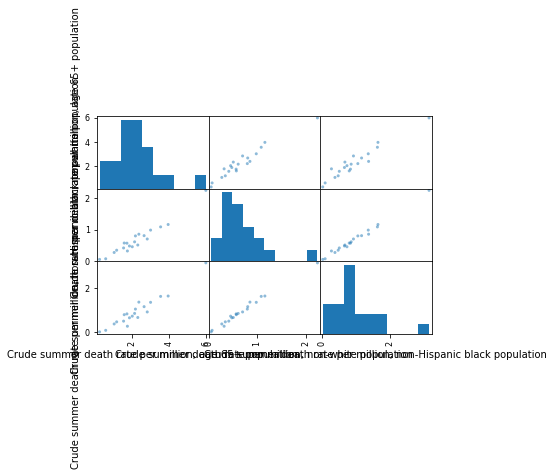

In [ ]:
pd.plotting.scatter_matrix(df_s.iloc[:, 1:9])

In [ ]:
cols2 = ['fips','Fall','Spring','Summer', 'Winter', 'max_warming_season' ,'Annual','STUSAB','STATE_NAME','STATENS']

graph = pd.read_csv("https://raw.githubusercontent.com/Vizulization-Final-Project/CLIMATE-CHANGE-NOAA/main/model_state.csv", usecols=cols2)\
.sample(n=50, replace=True)


graph.head()


,fips,Fall,Spring,Summer,Winter,max_warming_season,Annual,STUSAB,STATE_NAME,STATENS
12,19,0.363979,0.773898,0.061714,1.411697,Winter,0.647284,IA,Iowa,1779785
32,39,0.629771,1.041961,0.253136,1.381023,Winter,0.825316,OH,Ohio,1085497
34,41,1.301573,1.240705,1.613220,1.819386,Winter,1.500649,OR,Oregon,1155107
8,13,0.251217,0.174462,-0.016056,1.109362,Winter,0.384049,GA,Georgia,1705317
27,34,1.655732,1.759266,1.738723,2.748938,Winter,1.977277,NJ,New Jersey,1779795


In [ ]:
graph.head()

,fips,Spring,Summer,Winter,max_warming_season,Annual,STATE_NAME,STATENS
12,19,0.773898,0.061714,1.411697,Winter,0.647284,Iowa,1779785
32,39,1.041961,0.253136,1.381023,Winter,0.825316,Ohio,1085497
34,41,1.240705,1.613220,1.819386,Winter,1.500649,Oregon,1155107
8,13,0.174462,-0.016056,1.109362,Winter,0.384049,Georgia,1705317
27,34,1.759266,1.738723,2.748938,Winter,1.977277,New Jersey,1779795


In [ ]:
selection = alt.selection(type='interval')
plt5 = (alt.
         Chart(churn).
         mark_circle(size=50).
         encode(
          x='STATE_NAME	', y='Annual',
          color = alt.condition(selection, 'fips',  
          alt.value('lightgray'))
         ).
         add_selection(selection))

plt6 = (alt.
         Chart(churn).
         mark_bar().
         encode(y='fips', x='count(fips):Q',color = 'fips').
         transform_filter(selection))

In [ ]:
plt5 & plt6

ValueError: ignored

alt.VConcatChart(...)